# French Bakery Analysis
## Authored by Trinity Gahagen
#### Phase 2 Project for Flatiron School
---
---

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
from datetime import timedelta

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 13
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
bakery = pd.read_csv('Bakery sales.csv', parse_dates=['date'])

In [4]:
bakery.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


## Data Cleaning and Exploration
---

In [5]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64       
 4   article        234005 non-null  object        
 5   Quantity       234005 non-null  float64       
 6   unit_price     234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.5+ MB


In [6]:
bakery.describe()

,Unnamed: 0,date,ticket_number,Quantity
count,234005.000000,234005,234005.000000,234005.000000
mean,255205.035854,2021-11-30 11:33:31.049336576,219201.258738,1.538377
min,0.000000,2021-01-02 00:00:00,150040.000000,-200.000000
25%,127979.000000,2021-07-03 00:00:00,184754.000000,1.000000
50%,254573.000000,2021-11-04 00:00:00,218807.000000,1.000000
75%,382911.000000,2022-05-31 00:00:00,253927.000000,2.000000
max,511395.000000,2022-09-30 00:00:00,288913.000000,200.000000
std,147501.625992,NaN,40053.223896,1.289603


In [7]:
bakery.describe(include="O")

,time,article,unit_price
count,234005,234005,234005
unique,683,149,123
top,11:43,TRADITIONAL BAGUETTE,"1,20 €"
freq,859,67689,49080


In [8]:
bakery['Unnamed: 0'].head()

0    0
1    1
2    4
3    5
4    8
Name: Unnamed: 0, dtype: int64

In [9]:
bakery['Quantity'] = bakery['Quantity'].astype(int)

In [10]:
# Unnamed doesn't seem like a useful column, so we'll just drop it
try:
    bakery.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("Column already dropped")

In [11]:
# Clean unit_price column
bakery['unit_price_clean'] = bakery['unit_price'].str.extract("(\d+,\d+)")
bakery['unit_price_clean'] = bakery['unit_price_clean'].str.replace(",", ".").astype(float)
bakery[['unit_price', 'unit_price_clean']].head()

,unit_price,unit_price_clean
0,"0,90 €",0.90
1,"1,20 €",1.20
2,"1,20 €",1.20
3,"1,15 €",1.15
4,"1,20 €",1.20


In [12]:
# Convert to USD
EURO_TO_DOLLAR = 1.08 # 1 Euro = 1.08 USD

bakery['unit_price_usd'] = round(bakery['unit_price_clean'] * EURO_TO_DOLLAR, 2)
bakery['unit_price_usd'].head()

0    0.97
1    1.30
2    1.30
3    1.24
4    1.30
Name: unit_price_usd, dtype: float64

In [13]:
bakery['ticket_number'].nunique()

136451

In [14]:
bakery['total_spent_on_quantity'] = round(bakery['unit_price_usd'] * bakery['Quantity'], 2)
bakery['total_spent_on_quantity'].head()

0    0.97
1    3.90
2    2.60
3    1.24
4    6.50
Name: total_spent_on_quantity, dtype: float64

In [15]:
print(bakery['article'].nunique())
display(bakery['article'].unique())

149


array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [16]:
PERIOD_ARTICLES = bakery['article'] == '.'
bakery[PERIOD_ARTICLES]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
15360,2021-03-04,12:32,159219.0,.,2,"0,00 €",0.0,0.0,0.0
19904,2021-03-18,12:59,161853.0,.,1,"0,00 €",0.0,0.0,0.0
24959,2021-04-04,09:53,164878.0,.,1,"0,00 €",0.0,0.0,0.0
33569,2021-04-27,16:48,170079.0,.,1,"0,00 €",0.0,0.0,0.0
61792,2021-07-10,13:25,186662.0,.,2,"0,00 €",0.0,0.0,0.0


In [17]:
# Drop articles that just have period, since there's no price associated with them
if len(bakery[PERIOD_ARTICLES]) > 0:
    bakery.drop(bakery[PERIOD_ARTICLES].index, inplace=True)
else:
    print("Already dropped")

In [18]:
# There are negative quantities
bakery.loc[bakery['Quantity'] < 0]

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity
448,2021-01-03,10:41,150265.0,BAGUETTE,-1,"0,90 €",0.90,0.97,-0.97
1162,2021-01-05,19:00,150738.0,SPECIAL BREAD,-1,"2,40 €",2.40,2.59,-2.59
1163,2021-01-05,19:00,150738.0,DIVERS PATISSERIE,-1,"6,00 €",6.00,6.48,-6.48
1164,2021-01-05,19:00,150738.0,DIVERS BOULANGERIE,-1,"2,00 €",2.00,2.16,-2.16
1467,2021-01-08,11:58,150941.0,COUPE,-1,"0,15 €",0.15,0.16,-0.16
...,...,...,...,...,...,...,...,...,...
233054,2022-09-27,18:03,288312.0,COUPE,-2,"0,15 €",0.15,0.16,-0.32
233055,2022-09-27,18:03,288312.0,TRADITIONAL BAGUETTE,-1,"1,30 €",1.30,1.40,-1.40
233056,2022-09-27,18:03,288312.0,CEREAL BAGUETTE,-3,"1,35 €",1.35,1.46,-4.38
233553,2022-09-29,11:55,288639.0,BOISSON 33CL,-1,"1,50 €",1.50,1.62,-1.62


Here we see that there are negative quantities included in this dataset. From the Kaggle page, the owner of the dataset commented on this, saying:
>Sorry for the delay. Negative quantities might be due to till errors (the huge -200) or refunds


In [19]:
# Find all ticket numbers with negative values, assign to dataframe negative_groups
negative_groups = bakery.groupby('ticket_number', as_index=False)['Quantity'].sum()
negative_groups = negative_groups[negative_groups['Quantity'] < 0]

# Find all tickets immediately prior to ticket numbers with negative values that have ticket numbers that are positive
# Assign to dataframe potential_cancel_tickets
condition = (bakery['ticket_number'].isin(negative_groups['ticket_number'] - 1)) & (bakery['Quantity'].isin(abs(negative_groups['Quantity'])))
potential_cancel_tickets = bakery.loc[condition, ['ticket_number', 'Quantity']]
potential_cancel_tickets = potential_cancel_tickets.groupby('ticket_number', as_index=False)['Quantity'].sum()

# Make ticket numbers the same so we can join the two dataframes together
potential_cancel_tickets['ticket_number'] = potential_cancel_tickets['ticket_number'] + 1

# Join two dataframes so we can see how many of them cancel out
combined = pd.merge(negative_groups, potential_cancel_tickets, how='left', on='ticket_number')

# Create a column that indicates the two quantities sum to 0
combined['cancels'] = combined['Quantity_x'] + combined['Quantity_y'] == 0

# Print proportion of (negative tickets + cancel-out tickets) to total negative tickets
print(len(combined.loc[combined['cancels'] == True]) / len(combined))

0.9308996088657105


In [20]:
combined.isna().sum()

ticket_number     0
Quantity_x        0
Quantity_y       10
cancels           0
dtype: int64

## PLACEHOLDER: Figure out what to do about the negative quantities

In [21]:
# Separating time increments into separate columns for future grouping
bakery['month'] = bakery['date'].dt.month
bakery['year'] = bakery['date'].dt.year
bakery['day_of_the_week'] = bakery['date'].dt.day_of_week


DAY_DICT = {
    0 : "Mon",
    1 : "Tues",
    2 : "Wed",
    3 : "Thurs",
    4 : "Fri",
    5 : "Sat",
    6 : "Sun"
}

MONTH_DICT = {
    1 : "Jan",
    2 : "Feb",
    3 : "Mar",
    4 : "Apr",
    5 : "May",
    6 : "Jun",
    7 : "Jul",
    8 : "Aug",
    9 : "Sep",
    10 : "Oct",
    11 : "Nov",
    12 : "Dec"
}

bakery['month'].replace(MONTH_DICT, inplace=True)
bakery['day_of_the_week'].replace(DAY_DICT, inplace=True)

bakery.head()


,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,unit_price_usd,total_spent_on_quantity,month,year,day_of_the_week
0,2021-01-02,08:38,150040.0,BAGUETTE,1,"0,90 €",0.90,0.97,0.97,Jan,2021,Sat
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3,"1,20 €",1.20,1.30,3.90,Jan,2021,Sat
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2,"1,20 €",1.20,1.30,2.60,Jan,2021,Sat
3,2021-01-02,09:14,150041.0,PAIN,1,"1,15 €",1.15,1.24,1.24,Jan,2021,Sat
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5,"1,20 €",1.20,1.30,6.50,Jan,2021,Sat


In [22]:
try:
    bakery.drop(columns=['unit_price', 'unit_price_clean'], inplace=True)
except:
    print("Columns already dropped")

In [23]:
bakery['time_dt'] = bakery['date'].dt.strftime("%Y-%m-%d") + " " + bakery['time']
bakery['time_dt'] = pd.to_datetime(bakery['time_dt'])

In [24]:
bakery['time_dt'].head()

0   2021-01-02 08:38:00
1   2021-01-02 08:38:00
2   2021-01-02 09:14:00
3   2021-01-02 09:14:00
4   2021-01-02 09:25:00
Name: time_dt, dtype: datetime64[ns]

In [25]:
bakery['hour'] = bakery['time_dt'].dt.hour
bakery['hour'].head()

0    8
1    8
2    9
3    9
4    9
Name: hour, dtype: int32

In [26]:
bakery['day_of_month'] = bakery['date'].dt.day

In [27]:
bakery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234000 entries, 0 to 234004
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   date                     234000 non-null  datetime64[ns]
 1   time                     234000 non-null  object        
 2   ticket_number            234000 non-null  float64       
 3   article                  234000 non-null  object        
 4   Quantity                 234000 non-null  int32         
 5   unit_price_usd           234000 non-null  float64       
 6   total_spent_on_quantity  234000 non-null  float64       
 7   month                    234000 non-null  object        
 8   year                     234000 non-null  int32         
 9   day_of_the_week          234000 non-null  object        
 10  time_dt                  234000 non-null  datetime64[ns]
 11  hour                     234000 non-null  int32         
 12  day_of_month         

In [28]:
# Reordering columns
bakery = bakery[['time_dt',
                 'date',
                 'time',
                 'hour',
                 'year',
                 'month',
                 'day_of_month',
                 'day_of_the_week',
                 'ticket_number',
                 'article',
                 'Quantity',
                 'unit_price_usd',
                 'total_spent_on_quantity']]
bakery.columns

Index(['time_dt', 'date', 'time', 'hour', 'year', 'month', 'day_of_month',
       'day_of_the_week', 'ticket_number', 'article', 'Quantity',
       'unit_price_usd', 'total_spent_on_quantity'],
      dtype='object')

## Descriptive Analysis
---

#### What is the daily revenue of the bakery over time?

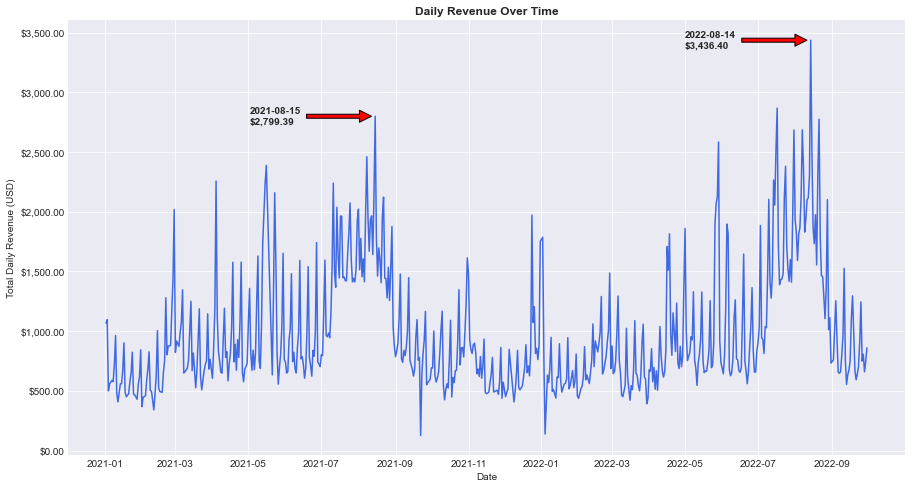

In [29]:
data = bakery.groupby('date')['total_spent_on_quantity'].sum()

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data.index, data, color='royalblue')
ax.set_xlabel('Date')
ax.set_ylabel('Total Daily Revenue (USD)')
ax.set_title('Daily Revenue Over Time')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)))

# Find the local maxima
maxes = data.sort_values(ascending=False)[0:3]
max_2022_date, max_2022_value = maxes.index[0], maxes[0]
max_2021_date, max_2021_value = maxes.index[2], maxes[2]

delta = timedelta(weeks=15)
ax.annotate(max_2022_date.strftime('%Y-%m-%d') + f'\n${max_2022_value:,.02f}',
            xy=(max_2022_date, max_2022_value),
            xycoords='data',
            xytext=(max_2022_date - delta, max_2022_value),
            va='center',
            ha='left',
            fontweight='bold',
            arrowprops=dict(facecolor='red', shrink=0.05))

ax.annotate(max_2021_date.strftime('%Y-%m-%d') + f'\n${max_2021_value:,.02f}',
            xy=(max_2021_date, max_2021_value),
            xycoords='data',
            xytext=(max_2021_date - delta, max_2021_value),
            va='center',
            ha='left',
            fontweight='bold',
            arrowprops=dict(facecolor='red', shrink=0.05));

It appears that there are large spikes in revenue in between July and September both years, with the highest points being on or around August 14th and 15th!

#### What is the frequency of orders over time on a given day?

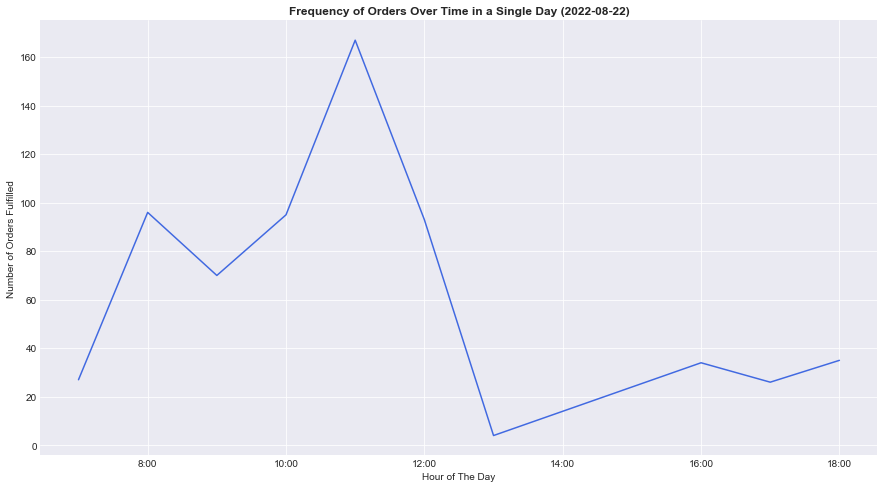

In [30]:
random_day = bakery['date'].sample(n=1, random_state=42).iloc[0]

random_day_df = bakery.loc[bakery['date'] == random_day]
random_day_df
data = random_day_df.groupby('hour')['ticket_number'].size()

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(data.index, data, color='royalblue')
ax.set_xlabel('Hour of The Day')
ax.set_ylabel('Number of Orders Fulfilled')
ax.set_title('Frequency of Orders Over Time in a Single Day (' +  random_day.strftime('%Y-%m-%d') + ')')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}:00'))

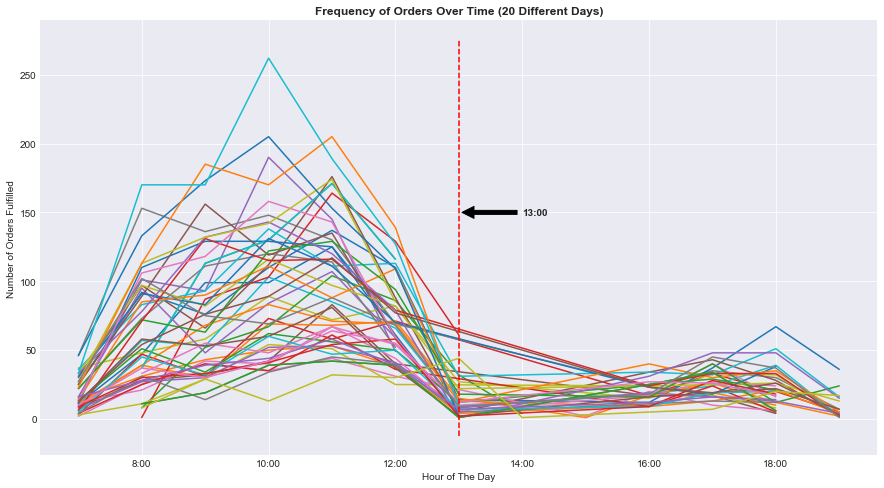

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))
color_map = sns.color_palette('tab10')
for i in range(50):
    random_day = bakery['date'].sample(n=1).iloc[0]

    random_day_df = bakery.loc[bakery['date'] == random_day]
    data = random_day_df.groupby('hour')['ticket_number'].size()

    ax.plot(data.index, data, color=color_map[i % 10])

ax.vlines(x=13, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='red', ls='--')
ax.annotate(text='13:00',
            xy=(13, 150),
            xytext=(14, 150),
            xycoords='data',
            va='center',
            ha='left',
            fontweight = 'bold',
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlabel('Hour of The Day')
ax.set_ylabel('Number of Orders Fulfilled')
ax.set_title('Frequency of Orders Over Time (20 Different Days)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}:00'))

Most days in this seem to follow the trend of being busy in the mornings and early afternoons, with frequency of orders decreasing dramatically at about 1pm.

#### Which months generate the most revenue?

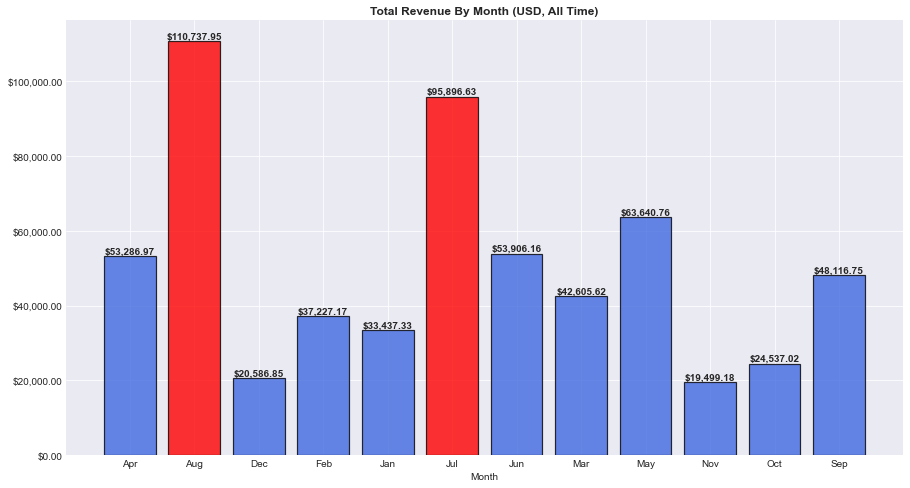

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
data = bakery.groupby('month')['total_spent_on_quantity'].sum()

color_map = ['royalblue' for i in range(12)]
color_map[1] = color_map[5] = 'red'
ax.bar(data.index, data, color=color_map, lw=1.2, alpha=0.8, edgecolor='black')
ax.set_xlabel('Month')
ax.set_title('Total Revenue By Month (USD, All Time)')
for i in data.index:
    ax.annotate(f'${data[i]:,.02f}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)));

#### Which days of the week generate the most revenue?

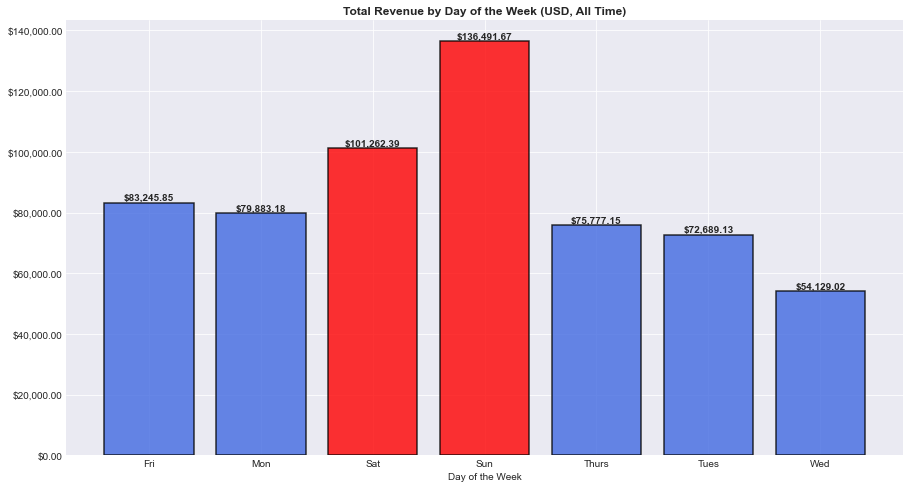

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))

data = bakery.groupby('day_of_the_week')['total_spent_on_quantity'].sum()

color_map = ['royalblue' for i in range(7)]
color_map[2] = color_map[3] = 'red'
ax.bar(x=data.index, height=data, color=color_map, lw=1.5, alpha=0.8, edgecolor='black')
ax.set_xlabel('Day of the Week')
ax.set_title('Total Revenue by Day of the Week (USD, All Time)')
for i in data.index:
    ax.annotate(f'${data[i]:,.02f}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.02f}'.format(y)));


#### What products sell the most?

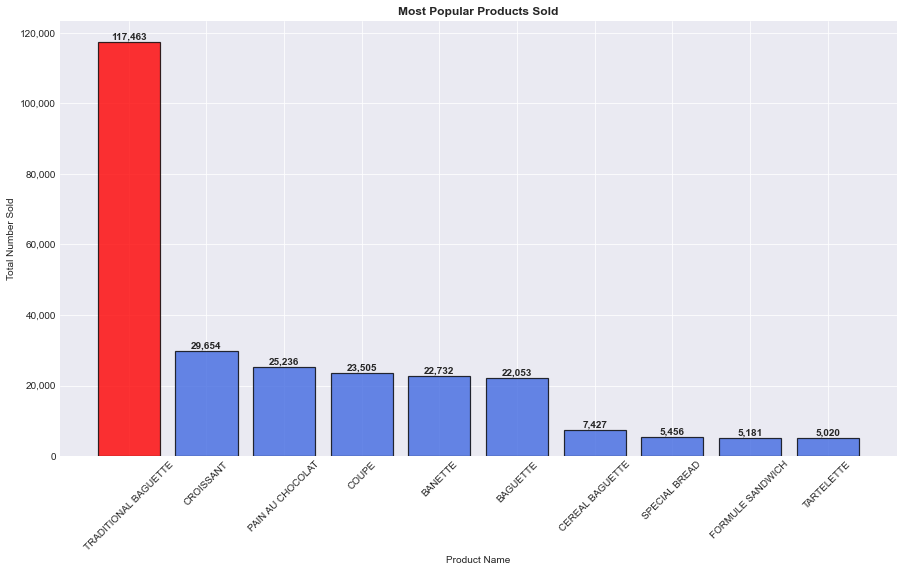

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
data = bakery.groupby('article')['Quantity'].sum().sort_values(ascending=False)[:10]

color_map = ['royalblue' for i in range(10)]
color_map[0] = 'red'
ax.bar(data.index, data, color=color_map, lw=1.2, edgecolor='black', alpha=0.8)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Number Sold')
ax.set_title('Most Popular Products Sold')
for i in data.index:
    ax.annotate(f'{data[i]:,}',
                xy=(i, data[i] + (0.012 * ax.get_ylim()[1])),
                fontweight='bold',
                va='center',
                ha='center')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0f}'.format(y)));

## Inferential Analysis

#### Is there a significant difference in daily revenue during different months of 2021?

*Side note* I'm only using one year because the months for 2022 are incomplete. There is no data past September for 2022.

Text(0.5, 0, 'Total Daily Revenue')

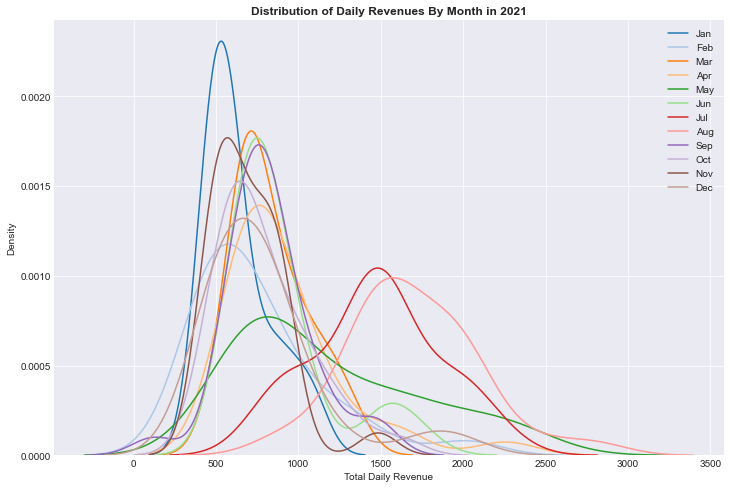

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
color_map = sns.color_palette('tab20')

# Get a list of all months
MONTHS = bakery['month'].unique()
YEAR_FILTER = bakery['year'] == 2021
# Separate into different dataframes for each month, group by daily revenue
for i, month in enumerate(MONTHS):
    MONTH_FILTER = bakery['month'] == month
    data = bakery.loc[MONTH_FILTER & YEAR_FILTER].groupby('day_of_month')['total_spent_on_quantity'].sum()
    sns.kdeplot(data=data, label=month, color=color_map[i])
ax.legend()
ax.set_title('Distribution of Daily Revenues By Month in 2021');
ax.set_xlabel('Total Daily Revenue')

#### Is there a significant difference in the frequency of orders *before* 1:00pm to orders *after* 1:00pm?

TODO: Figure out how to accurately represent frequency of orders
- Group by hour or minute and ticket number? But then how do I calculate the total number of tickets for each increment of time?

ValueError: No axis named ticket_number for object type DataFrame

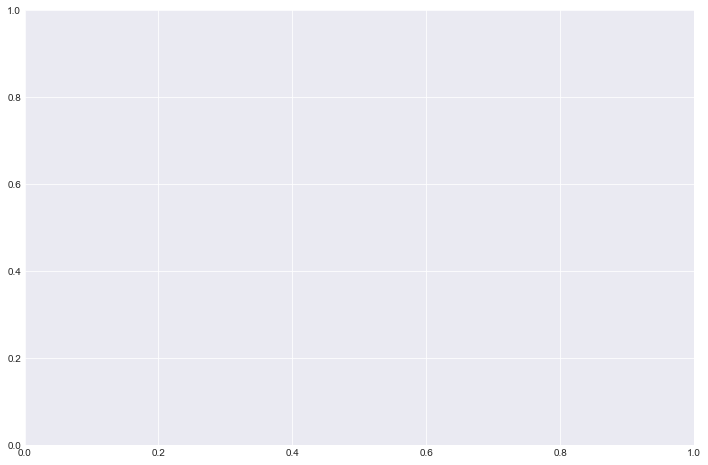

In [45]:
BEFORE_1PM = bakery['hour'] < 13

fig, ax = plt.subplots(figsize=(12, 8))

before_1pm = bakery.loc[BEFORE_1PM].groupby('time', 'ticket_number').size()
after_1pm = bakery.loc[~BEFORE_1PM].groupby('time', 'ticket_number').size()

print(before_1pm)

sns.kdeplot(data=before_1pm, label='Before 1pm', ax=ax)
sns.kdeplot(data=after_1pm, label='After 1pm', ax=ax)
ax.legend();